# Yunus Emre Taşcı / ID:25467

# Data Analysis prepared for CS210 course Spring 2018-2019

-------------------------------------------------

In [60]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline
from os.path import join
from pprint import pprint

Reading csv file

In [61]:
d_path = ""
filename = "taxi-trips.csv"
df = pd.read_csv(join(d_path, filename))


Printing the first five rows to check data 

In [62]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


The data read from csv file provides us informations about taxi trips in New York in a particular two weeks.


Exploring the data types so we can do the propriate operations later

In [63]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

To able to see general statistics among the data 

In [64]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


Importing reverse geocoder to get place information from given latitudes and longtitudes.

In [65]:
import reverse_geocoder as rg 


In [66]:
df_c=df.copy()#taking the of the data to preserve original content, i will be dealing with the copy throughout the project
ycor=df_c["pickup_longitude"]#collecting pick up coordinates
xcor=df_c["pickup_latitude"]
cordlist=list(zip(xcor,ycor))# zipping the coordinates to able to pass variables to the same row
result= rg.search(cordlist)#using reverse geocoder's function
myarray=[]
for i in result:
    name=i.get('name')#extracting name 
    myarray.append(name)
df_c["pickup_district"]=myarray#creating column
df_c["pickup_district"].head()


0           Manhattan
1    Long Island City
2           Weehawken
3           Manhattan
4       New York City
Name: pickup_district, dtype: object

Same operations as above for dropoff points

In [67]:

ycor1=df_c["dropoff_longitude"]
xcor1=df_c["dropoff_latitude"]
cordlist1=list(zip(xcor1,ycor1))
result= rg.search(cordlist1)
myarray1=[]
for i in result:
    name1=i.get('name')
    myarray1.append(name1)
df_c["dropoff_district"]=myarray1
df_c["dropoff_district"].head()

0           Manhattan
1           Manhattan
2           Manhattan
3    Long Island City
4       New York City
Name: dropoff_district, dtype: object

From the explored data above extracted the most used top five districts by picking up district

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


Text(0.5, 0, 'Pick-Up District')

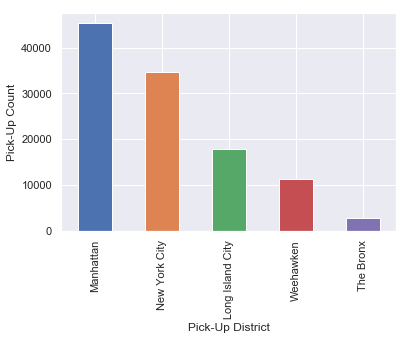

In [68]:
top5pick = df_c.groupby(by="pickup_district")['pickup_district'].count().sort_values(ascending=False)[:5]

print(top5pick)
chart1=top5pick.plot(kind="bar")
chart1.set_ylabel('Pick-Up Count')
chart1.set_xlabel('Pick-Up District')

Same as above but this time listed top 5 by dropping off districts.

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


Text(0.5, 0, 'Drop-Off District')

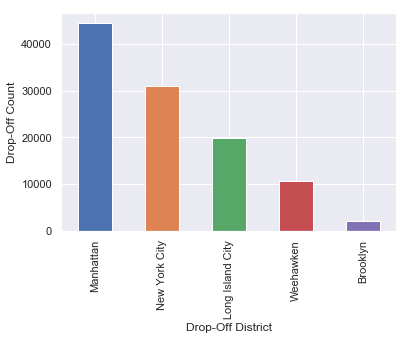

In [69]:
top5drop = df_c.groupby(by="dropoff_district")['dropoff_district'].count().sort_values(ascending=False)[:5]
print(top5drop)

chart2=top5drop.plot(kind="bar")
chart2.set_ylabel('Drop-Off Count')
chart2.set_xlabel('Drop-Off District')

To be able calcute the distance between dropoff point and pickup point, geopy is imported.

In [70]:
from geopy.distance import geodesic
distance=[]
for j in range (len(df_c["dropoff_district"])):#it is dropoff dist to get the lenght of the column it could be any other column name
    dist=geodesic(cordlist[j], cordlist1[j]).km
    distance.append(dist)#adding the result to distance array
df_c["distance"]=distance#describing distance array as column, to be used later
df_c["distance"].head()

0    1.502172
1    5.114807
2    1.495018
3    1.976279
4    2.513961
Name: distance, dtype: float64

EXTRACTING HOURS OF THE DAY CATEGORIZING THEM TO THE TIME INTERVAL THEY BELONG

In [71]:

dateserie= df_c["pickup_datetime"]
print(type(df_c["pickup_datetime"]))
hourarray=[]
hourtag=[]
for j in range (len(df_c["pickup_datetime"])):# to get the hours from the pickup column is i search for the index of hours
    onlyhour = dateserie[j]
    hour=int(onlyhour[10:13])#in "pickup_datetime" column hours of the dates are in indexes btw 10-13 so get them as integers
    hourarray.append(hour)
    tag=""
    if 9>=hourarray[j]>7:#categorizing hours
            tag = "rush hour morning"
    elif 16>=hourarray[j]>9:
            tag = "afternoon"
    elif 18>=hourarray[j]>16:
            tag = "rush hour evening"
    elif 23>=hourarray[j]>18:
            tag = "evening"
    else:
        tag="late night"
    hourtag.append(tag)
    
df_c["hour"]=hourarray
df_c["time_of_day"]=hourtag#adding categorizes to new column
df_c["time_of_day"].head()#to check


<class 'pandas.core.series.Series'>


0    rush hour evening
1              evening
2           late night
3            afternoon
4            afternoon
Name: time_of_day, dtype: object

Printing and comparing the average distances by the time of the day

Index(['time_of_day', 'distance'], dtype='object')


Text(0, 0.5, 'Average Distance in Km')

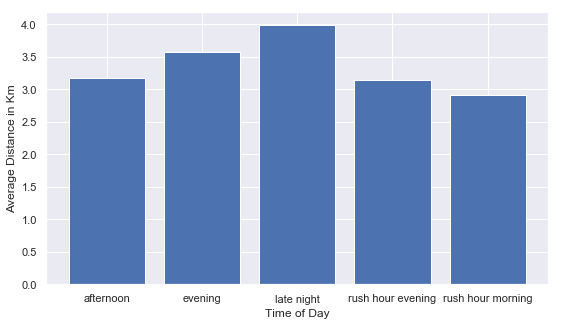

In [72]:
hourtaggroup=df_c.groupby("time_of_day")#grouping the same tags as one

mean=hourtaggroup.mean()["distance"]#taking average distance for each time of the day

meandf = mean.to_frame().reset_index()#transforming the serie to a dataframe 
print(meandf.columns)


axs = plt.subplots(1, 1, figsize=(9,5), sharey=True,)

axs[1].bar(meandf["time_of_day"], meandf["distance"])
plt.xlabel("Time of Day")
plt.ylabel("Average Distance in Km")

From this graph is can be deducted that trips done in late nights has longer distances compared to other times of the day. 

Exploring the data by how long does the ride goes according time of the day 

time_of_day
afternoon            978.032887
evening              886.287120
late night           846.288715
rush hour evening    963.484210
rush hour morning    973.641451
Name: trip_duration, dtype: float64


Text(0.5, 0, 'Average duration in seconds')

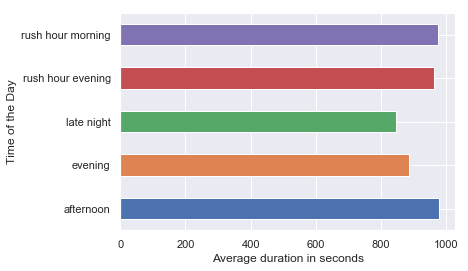

In [73]:
groupedtime = df_c.groupby("time_of_day")#grouping the dataframe by the time of day
avgdur = groupedtime["trip_duration"].mean()#taking average trip durations for each time of the day

chart4=avgdur.plot(kind="barh")
print(avgdur)
chart4.set_ylabel('Time of the Day')
chart4.set_xlabel('Average duration in seconds')

This graph shows us that trip durations in rush hours are relatively longer than other times of the day especially late nights and evenings.

***************************************************


# HYPOTHESIS TESTING

# Null Hypothesis: Passenger group size has no effect on the distance

*********************************************************

Since our hypothesis claims that there is no correlation between passanger group size i checked average distance every passenger group size traveled than i split them as passenger group size 1 and passenger group size more then one.

In [74]:
def isOne(passcount):#This function checks if the passenger count 1 or more
    if passcount==1:
        return int(1)
    elif passcount>1:
        return int (2)
df_c["isOne"]=df_c["passenger_count"].apply(isOne)#isOne function is applied to Passenger Count column and i created another column for the output
                                                    #for the ease of operation

[Text(0, 0, ' 1 Passenger'), Text(0, 0, 'More than 1 passenger')]

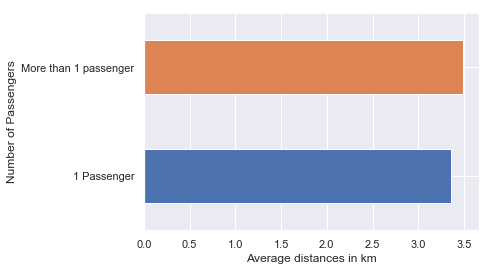

In [75]:
passengercount=df_c.groupby("isOne")
passcntbydistance=passengercount["distance"].mean()
chart5=passcntbydistance.plot(kind="barh")
chart5.set_ylabel('Number of Passengers')
chart5.set_xlabel('Average distances in km')
chart5.set_yticklabels( (' 1 Passenger', 'More than 1 passenger') )

We can observe from the chart above there is difference between distances this gives us a huge hint to reject our Null hypothesis("NO EFFECT statement"), but to be sure we need to apply T-TEST.

Applying the t-test to commentate with confidence on null hypothesis

In [76]:
#T-TEST
tested = "distance"
passOne = df_c[df_c["isOne"] == 1][tested] #t test applied for passenger count =1 an passenger count = more than one
passMore = df_c[df_c["isOne" ]== 2][tested] 
stats.ttest_ind(passOne, passMore) 

Ttest_indResult(statistic=-4.956248105611437, pvalue=7.196658294108276e-07)

P-values below 0.05 indicates strong evidence against the null hypothesis,since our pvalue is way below than 0.05 so null hypothesis is rejected in this case.
It can't be asserted that the passenger group size has no effect on the distance.

---------------------------------------------------------

Applying the Anova Test to handle all passenger count cases.

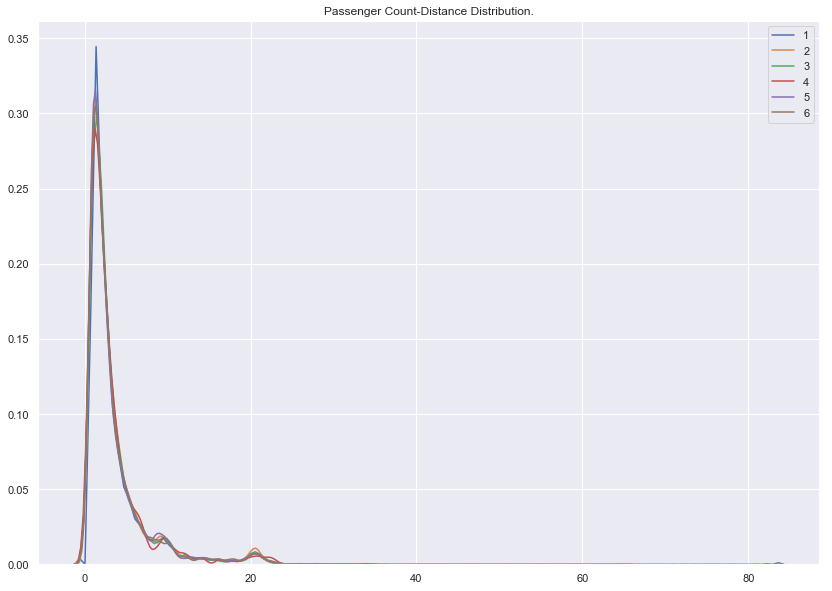

F_onewayResult(statistic=7.28309630510169, pvalue=7.86179334693054e-07)

In [77]:
tobeTested = "distance" 

pass1 = df_c[df_c["passenger_count"] == 1][tobeTested] 
pass2 = df_c[df_c["passenger_count"]  == 2][tobeTested] 
pass3 = df_c[df_c["passenger_count"]  == 3][tobeTested]                                                     
pass4 = df_c[df_c["passenger_count"]  == 4][tobeTested] 
pass5 = df_c[df_c["passenger_count"]  == 5][tobeTested] 
pass6 = df_c[df_c["passenger_count"] == 6][tobeTested] 
fig, ax = plt.subplots(1,1, figsize=(14,10))

sns.kdeplot(pass1,  label="1", ax=ax)
sns.kdeplot(pass2, label="2", ax=ax)
sns.kdeplot(pass3, label="3", ax=ax)
sns.kdeplot(pass4, label="4", ax=ax)
sns.kdeplot(pass5, label="5", ax=ax)
sns.kdeplot(pass6, label="6", ax=ax)
plt.title("Passenger Count-Distance Distribution.")

plt.show()
stats.f_oneway(pass1, pass2, pass3, pass4, pass5,pass6) 

Our p-value result from anova test for 7 days differently support the t-test done before. Again we reject our Null Hypothesis since the p-value is below than 0.05. 
After all these we can confidently say that null hypothesis rejected.

---------------------------------------------------------

# Null Hypothesis : The day of the week has no effect on the distance

*********************************************************************

First, it is discussed the relationship between average distance and weekday/weekends.

In [78]:

df_c["pickup_datetime"]=pd.to_datetime(df_c["pickup_datetime"])
df_c["day_name"]=df_c["pickup_datetime"].dt.weekday_name# Extracting the names of the by using datetime class
dayname=df_c["day_name"]




Splitting day names as week day and weekend.

In [79]:
def isWeekend(day):
    if day==("Sunday"):
        return str("Weekend")
    elif day==("Saturday"):
        return str("Weekend")
    else :
        return str("Week Day")
                   
df_c["weekend_weekday"]=df_c["day_name"].apply(isWeekend)#applying function to the returns weekday or weekend

week=df_c.groupby("weekend_weekday")
weekbydist=week.mean()["distance"]
weekbydist.plot(kind="barh")
chart.set_xlabel('Average distances in km')

Text(0, 0.5, 'Average distances in km')

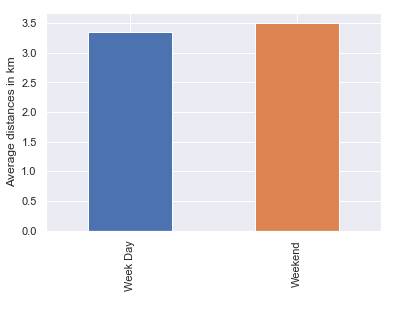

In [80]:
week=df_c.groupby("weekend_weekday")
weekbydist=week.mean()["distance"]# average distance by weekday and weekend
weekbydistdf = weekbydist.to_frame().reset_index()#transforming the serie to a dataframe fo the ease of opereation
chart8=weekbydist.plot(kind="bar")#plotting
chart8.set_xlabel(' ')
chart8.set_ylabel('Average distances in km')

We can observe that on weekends average distance is greater than on week days. To analyse it deeper it will be checked day by day. 

Text(0, 0.5, 'Day of the week')

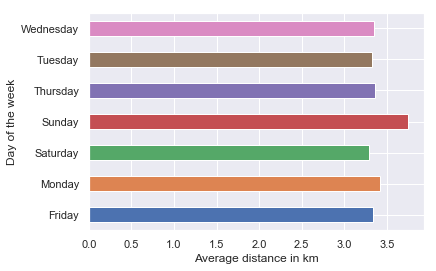

In [82]:
dayn=df_c.groupby("day_name")#grouping the same tags as one

daymean=dayn.mean()["distance"]#getting average distances by day
chart7=daymean.plot(kind="barh")
chart7.set_xlabel('Average distance in km')
chart7.set_ylabel('Day of the week')

We can see that there is a peak on Sunday, and it gives us a hint about our Null Hypothesis but we need to apply t-test to be sure.

In [55]:
#T-TEST
tested2 = "distance"

week_end = df_c[df_c["weekend_weekday"] == "Weekend"][tested2] 
week_day = df_c[df_c["weekend_weekday" ]== "Week Day"][tested2] 
stats.ttest_ind(week_end, week_day) 


Ttest_indResult(statistic=5.592069261035184, pvalue=2.2487318844870628e-08)

Again our p-value is way below than 0.05 so we can reject our null hypothesis. So we can't say that the day of the week has no effect on distance.

# AS A CONCLUSION;

**********************************************************

AFTER THE SUITABLE TESTS APPLIED, RESULTS ARE AS FOLLOWS;

************************************************

NULL HYPOTHESIS 1 = Passenger group size has no effect on the distance.

REJECTED. 

***************************************

NULL HYPOTHESIS 2 : The day of the week has no effect on the distance.

REJECTED.